In [4]:
test_fil = "disc1/OAS1_0001_MR1/FSL_SEG/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif"

from PIL import Image
import os


for oasis_dir in 
with Image.open(test_fil) as img:
    # Convert to PNG and save
    # target_path = os.path.join(target_folder, filename.replace('.gif', '.png'))
    img.convert('RGB').save("./test.png")
    print(f"Converted it to PNG.")

Converted it to PNG.


In [15]:
import os

def list_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return subdirectories

def list_files(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return files

def list_specific_files(directory, extension):
    files = [f for f in os.listdir(directory) if f.endswith(extension) and os.path.isfile(os.path.join(directory, f))]
    return files

# Specify the directory path
specified_directory = 'disc1'

# List all subdirectories
subdirs = list_subdirectories(specified_directory)
print("Subdirectories in", specified_directory, "are:")

Img_paths = []

for subdir in subdirs:
    img = list_specific_files("disc1/" + subdir + "/FSL_SEG", ".gif")[0]
    if "gfc" not in img:
        print("Not Trans")
    img_path = "disc1/" + subdir + "/FSL_SEG/" + img
    img_id = subdir
    Img_paths.append((img_id, img_path))

print(Img_paths)



Subdirectories in disc1 are:
[('OAS1_0016_MR1', 'disc1/OAS1_0016_MR1/FSL_SEG/OAS1_0016_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0002_MR1', 'disc1/OAS1_0002_MR1/FSL_SEG/OAS1_0002_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0003_MR1', 'disc1/OAS1_0003_MR1/FSL_SEG/OAS1_0003_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0017_MR1', 'disc1/OAS1_0017_MR1/FSL_SEG/OAS1_0017_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0001_MR1', 'disc1/OAS1_0001_MR1/FSL_SEG/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0015_MR1', 'disc1/OAS1_0015_MR1/FSL_SEG/OAS1_0015_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0029_MR1', 'disc1/OAS1_0029_MR1/FSL_SEG/OAS1_0029_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0028_MR1', 'disc1/OAS1_0028_MR1/FSL_SEG/OAS1_0028_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'), ('OAS1_0014_MR1', 'disc1/OAS1_0014_MR1/FSL_SEG/OAS1_0014_MR1_mpr_n4_anon_111_t88_m

(208, 176)


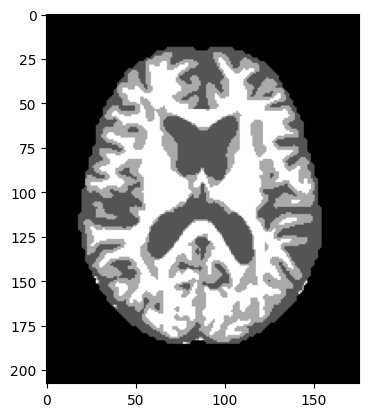

In [80]:
from PIL import Image
import torch
import imageio.v3 as iio
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def gif_to_tensor(file_path):
    # Open the GIF file
    gif = Image.open(file_path)

    # Convert GIF to NumPy array
    gif_array = []
    try:
        while True:
            gif_array.append(np.array(gif))
            gif.seek(gif.tell() + 1)
    except EOFError:
        pass

    # Convert NumPy array to PyTorch tensor
    transform = transforms.ToTensor()
    gif_tensor = torch.stack([transform(frame) for frame in gif_array])

    return np.array(gif)

# Path to the GIF file
gif_file_path = 'disc1/OAS1_0016_MR1/FSL_SEG/OAS1_0016_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif'

img_tensors = []
# Convert GIF to PyTorch tensor
y_id = []
for img in Img_paths:
    gif_as_tensor = gif_to_tensor(img[1])
    img_tensors.append(gif_as_tensor)
    y_id.append(img[0])

print(img_tensors[0].shape)
plt.imshow(img_tensors[0], cmap=plt.cm.gray)

In [65]:
import pandas as pd

cross_secional = pd.read_csv("oasis_cross-sectional.csv")
y = []
cross_secional.fillna(value=0, inplace=True)
print(y_id)
for i in y_id:
    y.append(cross_secional.loc[cross_secional['ID'] == i]["CDR"].values[0])
print(y)

['OAS1_0016_MR1', 'OAS1_0002_MR1', 'OAS1_0003_MR1', 'OAS1_0017_MR1', 'OAS1_0001_MR1', 'OAS1_0015_MR1', 'OAS1_0029_MR1', 'OAS1_0028_MR1', 'OAS1_0014_MR1', 'OAS1_0038_MR1', 'OAS1_0004_MR1', 'OAS1_0010_MR1', 'OAS1_0011_MR1', 'OAS1_0005_MR1', 'OAS1_0039_MR1', 'OAS1_0013_MR1', 'OAS1_0007_MR1', 'OAS1_0006_MR1', 'OAS1_0012_MR1', 'OAS1_0037_MR1', 'OAS1_0023_MR1', 'OAS1_0022_MR1', 'OAS1_0020_MR1', 'OAS1_0034_MR1', 'OAS1_0009_MR1', 'OAS1_0035_MR1', 'OAS1_0021_MR1', 'OAS1_0019_MR1', 'OAS1_0025_MR1', 'OAS1_0031_MR1', 'OAS1_0030_MR1', 'OAS1_0018_MR1', 'OAS1_0032_MR1', 'OAS1_0026_MR1', 'OAS1_0027_MR1', 'OAS1_0033_MR1', 'OAS1_0040_MR1', 'OAS1_0041_MR1', 'OAS1_0042_MR1']
[0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]


In [96]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(img_tensors, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
print(X_train.shape)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

torch.Size([31, 208, 176])


In [97]:
import torch.nn as nn
import torch.optim as optim
# Define a two-layer neural network using nn.Sequential
# Define a two-layer neural network using nn.Sequential
model = nn.Sequential(
    nn.Linear(36608, 31),  # Input layer to hidden layer
    nn.ReLU(),                        # ReLU activation function
    nn.Linear(31, 3)  # Hidden layer to output layer match input layer
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() # becuase iris is multi-class 
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
batch_size = 32 

loss_array = []
for epoch in range(num_epochs):
    outputs = model(X_train.view(31, -1))
    loss = criterion(outputs, y_train)
    loss_array.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation always call this first before next step.
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == y_test).sum().item() / y_test.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1664x176 and 36608x31)